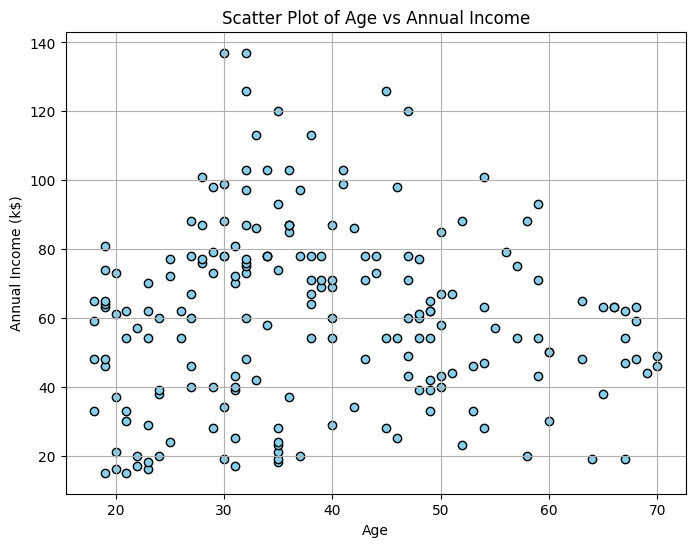

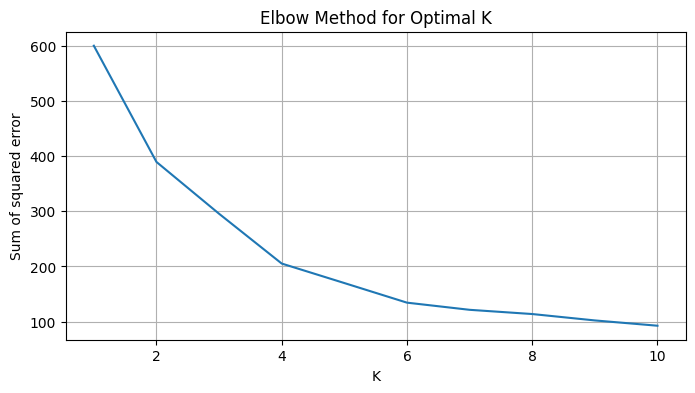

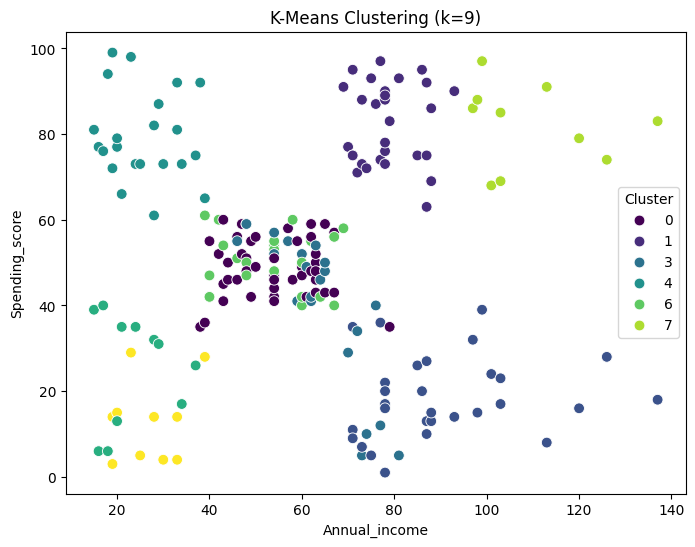

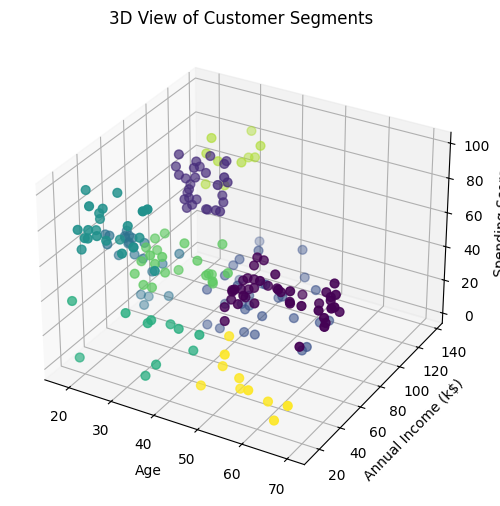

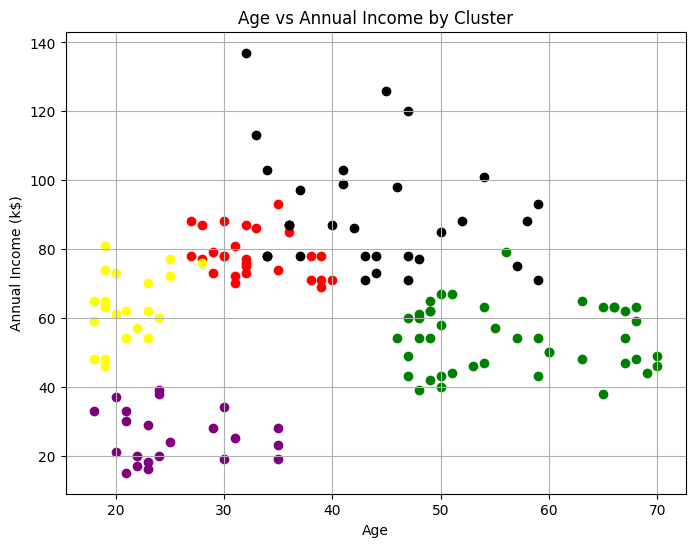

Cluster Profiles:
           Age  Annual_income  Spending_score
Cluster                                      
0        56.70          54.07           48.66
1        32.86          78.55           82.17
2        44.00          90.13           17.93
3        21.00          63.23           40.68
4        25.27          25.73           79.36
5        34.09          23.55           25.45
6        33.41          53.14           50.32
7        32.20         109.70           82.00
8        55.20          26.90           13.00


102.13623844329251

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
k_opt = int(input("Enter no.of clusters you need :"))
df = pd.read_csv("dataset/Mall_Customers.csv")
df.rename(columns={'Annual Income (k$)': 'Annual_income', 
                   'Spending Score (1-100)': 'Spending_score'}, inplace=True)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Annual_income'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot of Age vs Annual Income')
plt.grid(True)
plt.show()

features = df[['Age', 'Annual_income', 'Spending_score']]
scaler = StandardScaler()
X = scaler.fit_transform(features)

sse = []
k_rng = range(1, 11)
for k in k_rng:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=k_opt, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual_income', y='Spending_score', 
                hue='Cluster', palette='viridis', s=60)
plt.title(f'K-Means Clustering (k={k_opt})')
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual_income'], df['Spending_score'],
           c=df['Cluster'], cmap='viridis', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
plt.title('3D View of Customer Segments')
plt.show()

df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]
df4 = df[df.Cluster == 4]

plt.figure(figsize=(8,6))
plt.scatter(df0.Age, df0['Annual_income'], color='green')
plt.scatter(df1.Age, df1['Annual_income'], color='red')
plt.scatter(df2.Age, df2['Annual_income'], color='black')
plt.scatter(df3.Age, df3['Annual_income'], color='yellow')
plt.scatter(df4.Age, df4['Annual_income'], color='purple')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income by Cluster')
plt.grid(True)
plt.show()

print("Cluster Profiles:")
print(df.groupby('Cluster')[['Age','Annual_income','Spending_score']].mean().round(2))

df.to_csv("clustered_customers.csv", index=False)
cluster_profiles = df.groupby('Cluster')[['Age', 'Annual_income', 'Spending_score']].mean().round(2)
cluster_profiles.to_csv("cluster_profiles_summary.csv")
kmeans.inertia_
